ML Project

Breast Cancer Type Detection

classify whether cancer is malignant or benign

In [68]:
#loading all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import GLM as glm
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [40]:
df=pd.read_csv('Cancer.csv')

# 1- EDA

In [41]:
#checking nulls and datatypes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [42]:
#identifying column with NA values
nas=df.isna().sum()[df.isna().sum()>0]
print(f"{nas.index[0]} has {nas[0]} NA values in its column. There are no missing values in the other columns.")

Unnamed: 32 has 569 NA values in its column. There are no missing values in the other columns.


In [43]:
# Dropping the column with NAs

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [44]:
#statistical summary 

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [45]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Text(0.5, 1.0, 'Boxplot of radius_mean by Diagnosis')

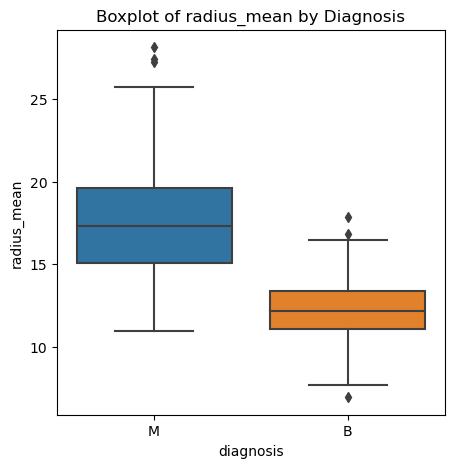

In [46]:
# Boxplot of radius_mean by Diagnosis

plt.figure(figsize=(5,5))
sns.boxplot(data=df,x='diagnosis',y='radius_mean',hue_order='diagnosis')
plt.title('Boxplot of radius_mean by Diagnosis')

In [47]:
# Insights : For 'M', the IQR is larger, which tells M has a greater variance in radius_mean values than in 'B'. 
#Also M has a higher median than B

In [48]:
# Count of each diagnosis to check if there is a bias in dataset

count_diagnosis=pd.Series(round(df['diagnosis'].value_counts(normalize=True)*100,2)).reset_index()
count_diagnosis

,diagnosis,proportion
0,B,62.74
1,M,37.26


In [49]:
#Insights : In the dataset, number of cases diagnosed with B is higher than M

Text(0.5, 1.0, 'Histogram of area_mean')

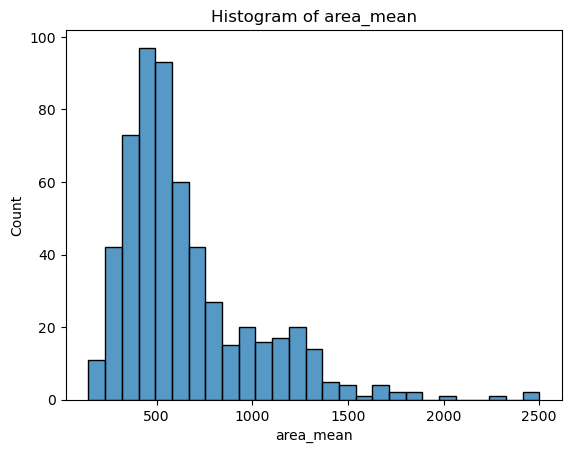

In [50]:
# Histogram of area_mean

sns.histplot(data=df,x='area_mean')
plt.title('Histogram of area_mean')

In [51]:
# Insights : The majority of the values are concentrated on the lower end of the scale.(0-1000)
# which makes this distribution right skewed 

Text(0.5, 1.0, 'Scatterplot of Texture and Perimeter by Diagnosis')

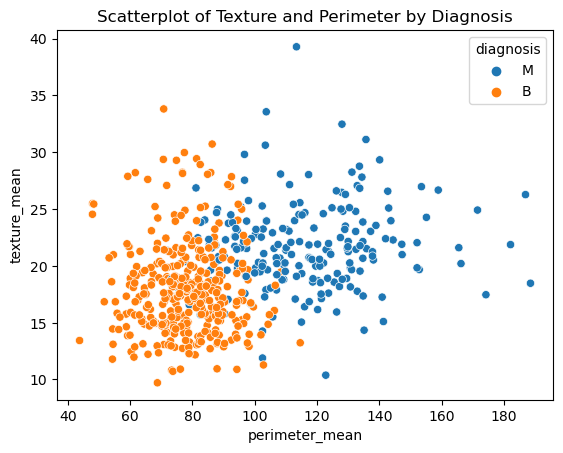

In [52]:
# scatterplot of texture and perimeter

sns.scatterplot(data=df,x='perimeter_mean',y='texture_mean',hue='diagnosis')
plt.title('Scatterplot of Texture and Perimeter by Diagnosis')

In [53]:
#Insights : there is little overlap between the two categories, and not any distinct correlation by eyeballing
# but at higher values, there is separation in data and this separation could potentially be used for diagnostic purposes.

In [54]:
# Correlation

df.iloc[:,2:].corr().head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


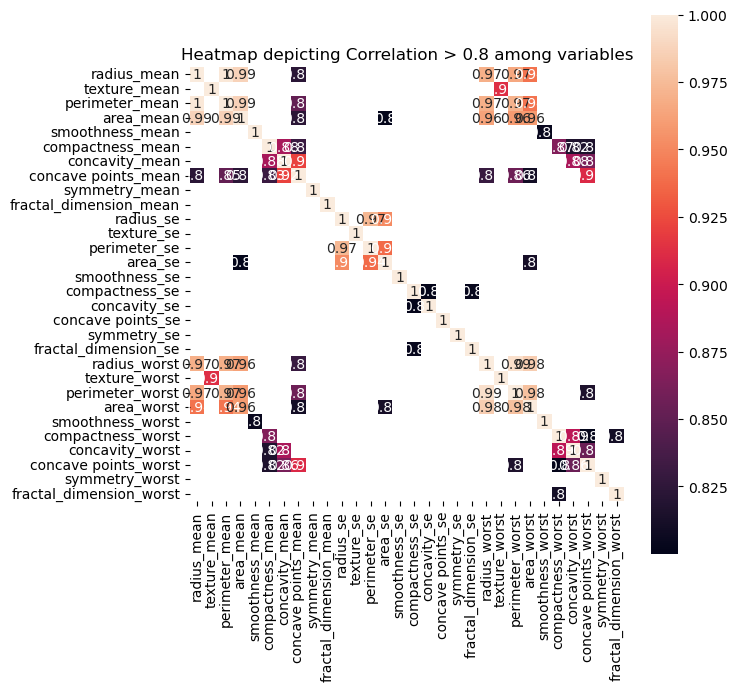

In [55]:
plt.figure(figsize=(7,7))
sns.heatmap(df.iloc[:,2:].corr()[df.iloc[:,2:].corr()>0.8],annot=True,square=True)
plt.title('Heatmap depicting Correlation > 0.8 among variables')
plt.show()
# only plotting those which have greater than 0.8 correlation

Insights : There is strong positive correlation between many of the variables, Due to this high correlation, there could be multicollinearity, which can distort the results of statistical models.

# 2) Logistic Regression Model Development

In [56]:
#dropping unncecessary column

df.drop(columns='id',axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [57]:
# dummy variable (diagnosis_M)
df=pd.get_dummies(df,drop_first=True)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,True
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,True
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,True


In [61]:
# splitting the dataframe into x and y

y=df['diagnosis_M']
x=df.drop(columns='diagnosis_M',axis=1)

In [62]:
# Scaling/standardizing the data

ss=StandardScaler()
x_s=ss.fit_transform(x)
x_s=pd.DataFrame(x_s,columns=x.columns)


In [64]:
#splitting in 75-25 ratio
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.25,random_state=1)

In [66]:
#logistic regression model
model_1_sk = LogisticRegression()
model_1_sk.fit(x_train,y_train)
pred_1_sk=model_1_sk.predict(x_test)
pred_1_sk

array([False,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False,  True, False,  True, False, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False,  True,  True, False, False,  True, False,
        True, False,  True, False, False,  True, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False,  True,  True, False,
       False, False, False, False,  True,  True, False, False,  True,
        True, False,

In [106]:
print('Intercept:', model_1_sk.intercept_)


Intercept: [-0.33289946]


In [107]:
print('Co-efficients: \n',model_1_sk.coef_)

Co-efficients: 
 [[ 0.45856114  0.39546554  0.44517615  0.49703821  0.0858236  -0.30482898
   0.72127131  0.76435998  0.02816754 -0.35960701  1.06679318  0.03329303
   0.53688629  0.76075692  0.21751766 -0.9024823   0.0726892   0.4931397
  -0.1774552  -0.71235893  1.05094738  0.96507714  0.90281058  0.97922538
   0.42311568  0.04773773  0.83153207  0.93341487  0.79438484  0.64624262]]


Preprocessing of data to build logistic regression model:

--we removed unnamed column which had all NA values, we also removed columns which were not important for model building like 'ID'

--we plotted heatmap, scatterplot and histogram to understand the data and draw insights from them.

--We converted diagnosis_M into dummy variable where M = 1 and B=0, this column was dropped from the data frame and put into y variable,

--We then converted the dataframe into dependent and independent variable form where y was diagnosis_M, and rest all columns in x variable.

--To bring all the values to similar scale, we standardized the data so there is no bias of any variable because of defferent ranges.

--We then split the data into 75% for training and 25% for testing the model

--At last we predicted the values with x_test when we fitted the the Logistic Regression model to the training components x_train and y_train.

# 3) Model Evaluation

In [108]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [109]:
y_test = y_test.astype('int32')

In [110]:
# R^2
r_square_sk= r2_score(y_test,pred_1_sk)
print('Out of Sample R Square=',round(r_square_sk,2))

# RMSE
rmse_sk=round((mean_squared_error(y_test,pred_1_sk))**0.5,2)
print('OOS Root Mean Square Error =',rmse_sk)

# Accuracy Score
acc_score_sk=accuracy_score(y_test,pred_1_sk)
print("Accuracy Score =",round(acc_score_sk,2))



Out of Sample R Square= 0.91
OOS Root Mean Square Error = 0.14
Accuracy Score = 0.98


All the values are almost Ideal, OOS r-square and accuracy is extremely high and OOS RMSE is very low, which is what we want in a model but these values could be too good to be true.

This can also be interpreted as goodness of fit of our model which is 0.91, A high value, such as 0.91, suggests that the model is performing well on new, unseen data. 

RMSE is when we compute the error terms between y from the testing dataset and predicted values of y, and we want the diference between both as least as possible indicating that our model is able to predict values as close as the actual ones, so lower RMSE like in this case is good for our model

But there is high level of multicollinearity in the dataset, so the co-efficient which we calculated in previous part can be considered unreliable.

# 4) Testing Interactions Between Features

In [73]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,True
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,True
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,True


In [111]:
# selecting columns to generate interaction terms
import statsmodels.api as smf
df_ints=df.loc[:,['radius_mean','concavity_se','diagnosis_M']]
df_ints

,radius_mean,concavity_se,diagnosis_M
0,17.99,0.05373,True
1,20.57,0.01860,True
2,19.69,0.03832,True
3,11.42,0.05661,True
4,20.29,0.05688,True
...,...,...,...
564,21.56,0.05198,True
565,20.13,0.03950,True
566,16.60,0.04730,True
567,20.60,0.07117,True


In [115]:
df_ints['diagnosis_M']=df_ints['diagnosis_M'].astype('int32')
df_ints['interaction_radius'] = df_ints['diagnosis_M']*df_ints['radius_mean']

df_ints['interaction_concavity'] = df_ints['diagnosis_M']*df_ints['concavity_se']
x_new = df_ints[['diagnosis_M','concavity_se','radius_mean','interaction_radius','interaction_concavity']]
x_new = smf.add_constant(x_new)
y_new=df_ints['diagnosis_M'].astype('int32')
y_new


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis_M, Length: 569, dtype: int32

In [116]:
# Making a model with interaction terms
diagnosis_M.info()
lm_model=smf.OLS(y_new,x_new).fit()
lm_model.summary()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: diagnosis_M
Non-Null Count  Dtype
--------------  -----
569 non-null    int32
dtypes: int32(1)
memory usage: 2.4 KB


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            diagnosis_M   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.337e+28
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:46:23   Log-Likelihood:                 17130.
No. Observations:                 569   AIC:                        -3.425e+04
Df Residuals:                     563   BIC:                        -3.422e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.291e-15   7.68e-15     -0.168      0.866   -1.64e-14    1.38e-14
diagnosis_M               1.0000    1.1e-14   9.07e+13      0.000       1.000       1.000
concavity_se           1.497e-16   3.32e-14      0.005      0.996   -6.51e-14    6.54e-14
radius_mean            -1.64e-15   6.14e-16     -2.673      0.008   -2.85e-15   -4.35e-16
interaction_radius     2.824e-15   7.61e-16      3.713      0.000    1.33e-15    4.32e-15
interaction_concavity  8.882e-16   7.44e-14      0.012      0.990   -1.45e-13    1.47e-13
==============================================================================
Omnibus:                     3621.450   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.740
Skew:                          -0.529   Prob(JB):                     1.46e-19
Kurtosis:                       1.406   Cond. No.                     1.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
# seperating the target variable and indepentdent variables for linear regression

y_lm=df_ints['diagnosis_M']
x_lm=df_ints.drop(y_lm.name,axis=1)

In [117]:
x_train_interact,x_test_interact, y_train_interact, y_test_interact = train_test_split(x_lm,y_lm,test_size=0.25,random_state = 1)

In [118]:
# Linear regression

import statsmodels.api as smf

model_lm = smf.OLS(y_train_interact, x_train_interact).fit()
model_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            diagnosis_M   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.740e+28
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:37:40   Log-Likelihood:                 12715.
No. Observations:                 426   AIC:                        -2.541e+04
Df Residuals:                     417   BIC:                        -2.537e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
1                        -4.163e-16   2.26e-14     -0.018      0.985   -4.49e-14    4.41e-14
radius_mean               6.245e-17   3.49e-15      0.018      0.986   -6.79e-15    6.92e-15
concavity_se              2.665e-15   2.95e-13      0.009      0.993   -5.77e-13    5.82e-13
radius_mean^2              1.05e-16   1.45e-16      0.723      0.470    -1.8e-16     3.9e-16
radius_mean concavity_se  -2.22e-16    2.3e-14     -0.010      0.992   -4.55e-14    4.51e-14
radius_mean diagnosis_M   5.898e-17   2.11e-15      0.028      0.978   -4.08e-15     4.2e-15
concavity_se^2            1.776e-15   3.35e-13      0.005      0.996   -6.57e-13    6.61e-13
concavity_se diagnosis_M  8.882e-16   1.97e-13      0.005      0.996   -3.85e-13    3.87e-13
diagnosis_M^2                1.0000   3.14e-14   3.19e+13      0.000       1.000       1.000
==============================================================================
Omnibus:                      134.197   Durbin-Watson:                   0.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              331.119
Skew:                          -1.578   Prob(JB):                     1.25e-72
Kurtosis:                       5.949   Cond. No.                     7.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
y_pred_interact = model_lm.predict(x_test_interact)
y_pred_interact

421    2.312245e-14
47     1.000000e+00
292    1.798894e-14
186    1.000000e+00
414    1.000000e+00
           ...     
232    1.349702e-14
413    2.408220e-14
514    1.000000e+00
244    1.000000e+00
415    1.516418e-14
Length: 143, dtype: float64

In [120]:
residual = y_pred_interact - y_test_interact
mean_square_error = np.mean(residual**2)
rmse = np.sqrt(mean_square_error)
rmse

2.5687334763243716e-14

q- Discuss issues that occur when using a linear regression model to predict binary outcomes.


Using linear regression for binary outcomes has drawbacks:

1-Assumptions about residuals being normally distributed can be violated, leading to biased estimates.

2-It can predict values outside the 0 to 1 range, which is incorrect

The interaction terms in the model have the following influences:

1.The intercept, when all other variables are constant, represents the log odds of diagnosis B, which is approximately -1.291e-15  when run on entire model and -4.163e-16 when run on training model.

2.A one-unit increase in radius mean, while keeping all other variables constant, reduces the log odds of diagnosis B by approximately -1.64e-15.

3.When diagnosis M is 1 (considering it as the reference level), a one-unit increase in radius mean leads to an increase in the log odds of diagnosis M by approximately 2.824e-15.

4.Similarly, when diagnosis M is 1, and concavity se increases by a unit, the log odds of diagnosis M increases by approximately 8.882e-16.

In [119]:
y_train = y_train.astype('int32')

# 5) Feature Selection and Cross-Validation: Full vs. Reduced Model

In [120]:
#using backward selection method

from sklearn.feature_selection import SequentialFeatureSelector as sfs
selected_cols=sfs(model_1_sk,scoring='r2',direction='backward')
selected_cols.fit(x_train,y_train)
selected_cols.get_feature_names_out()

array(['texture_mean', 'concavity_mean', 'radius_se', 'area_se',
       'compactness_se', 'concavity_se', 'concave points_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst'], dtype=object)

In [128]:
# selecting selected features

x_s_new=x_s[selected_cols.get_feature_names_out()]
x_s_new

,texture_mean,concavity_mean,radius_se,area_se,compactness_se,concavity_se,concave points_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,symmetry_worst
0,-2.073335,2.652874,2.489734,2.487578,1.316862,0.724026,0.660820,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.109526,2.750622
1,-0.353632,-0.023846,0.499255,0.742402,-0.692926,-0.440780,0.260162,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.146749,-0.243890
2,0.456187,1.363478,1.228676,1.181336,0.814974,0.213076,1.424827,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,0.854974,1.152255
3,0.253732,1.915897,0.326373,-0.288378,2.744280,0.819518,1.115007,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,1.989588,6.046041
4,-1.151816,1.371011,1.270543,1.190357,-0.048520,0.828471,1.144205,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,0.613179,-0.868353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,1.947285,2.782080,2.604187,0.191805,0.666001,2.067178,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,0.664512,-1.360158
565,2.085134,0.693043,1.300499,1.291565,-0.069758,0.252202,0.808431,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,0.236573,-0.531855
566,2.045574,0.046588,0.184892,0.180698,0.661277,0.510827,0.612157,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.326767,-1.104549
567,2.336457,3.296944,1.157935,1.009503,2.017716,1.302285,0.785721,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.197605,1.919083


In [129]:
x_train,x_test,y_train,y_test=train_test_split(x_s_new,y,test_size=0.25,random_state=1)

In [130]:
# sklearn
model_2_sk= LogisticRegression()
model_2_sk.fit(x_train,y_train)
pred_2_sk=model_2_sk.predict(x_test)
pred_2_sk

array([False,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False,  True, False,  True, False, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False,  True,  True, False, False,  True, False,
        True, False,  True, False, False,  True, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True,  True, False, False,  True,
        True, False,

In [131]:
y_test=y_test.astype('int32')
y_test.info()

<class 'pandas.core.series.Series'>
Index: 143 entries, 421 to 415
Series name: diagnosis_M
Non-Null Count  Dtype
--------------  -----
143 non-null    int32
dtypes: int32(1)
memory usage: 1.7 KB


In [132]:
# sklearn


r_square_sk= r2_score(y_test,pred_2_sk)
print('Out of Sample R Square=',round(r_square_sk,2))

# RMSE
rmse_sk=round((mean_squared_error(y_test,pred_2_sk))**0.5,2)
print('OOS Root Mean Square Error =',rmse_sk)

# Accuracy Score
acc_score_sk=accuracy_score(y_test,pred_2_sk)
print("Accuracy Score =",round(acc_score_sk,2))


Out of Sample R Square= 0.91
OOS Root Mean Square Error = 0.14
Accuracy Score = 0.98


In [133]:
y = y.astype('int32')

In [134]:
# K-Fold - Reduced

from sklearn.model_selection import cross_val_score as cvs

scores= cvs(model_2_sk,x_s_new,y,cv=10,scoring='r2')

print(f"Average R-Square is {round(scores.mean(),3)} with a standard deviation of {round(scores.std(),3)}")


Average R-Square is 0.925 with a standard deviation of 0.048


In [135]:
# K-Fold - Full

scores= cvs(model_1_sk,x_s,y,cv=10,scoring='r2')

print(f"Average R-Square is {round(scores.mean(),3)} with a standard deviation of {round(scores.std(),3)}")

Average R-Square is 0.917 with a standard deviation of 0.063


Reduced model performs better as it has higher Avg R-sq. value which is 0.925 compared to full model with Avg R-sq. 0.917

also in terms of standard deviation, reduced model has less std deviation making it better